In [2]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42) #for reproducibility 
X1= np.random.rand(1000,1)
X2= np.random.rand(1000,1)

y= 10 + 5*X1 + 2 * X2 + np.random.randn(1000,1) #target variable with noise

X= np.hstack((X1,X2))  #feature matrix

In [8]:
def mini_batch_gradient_descent(X, y, batch_size=32, epochs=100, lr=0.01):

    m, n = X.shape #number of samples and features
    weights=np.zeros(n,1)
    bias=0
    loss_history=[]

def mini_batch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=32):
    m, n = X.shape # m samples, n features
    weights = np.zeros((n, 1))
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        # 1. Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # 2. Loop through batches
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            # 3. Predict and Error
            y_pred = np.dot(X_batch, weights) + bias
            error = y_pred - y_batch
            
            # 4. Gradients (average of the batch)
            w_grad = (2/batch_size) * np.dot(X_batch.T, error)
            b_grad = (2/batch_size) * np.sum(error)
            
            # 5. Update
            weights -= lr * w_grad
            bias -= lr * b_grad
            
        # Record loss for plotting
        full_pred = np.dot(X, weights) + bias
        loss_history.append(np.mean((full_pred - y)**2))
        
    return weights, bias, loss_history

w, b, history = mini_batch_gradient_descent(X, y)



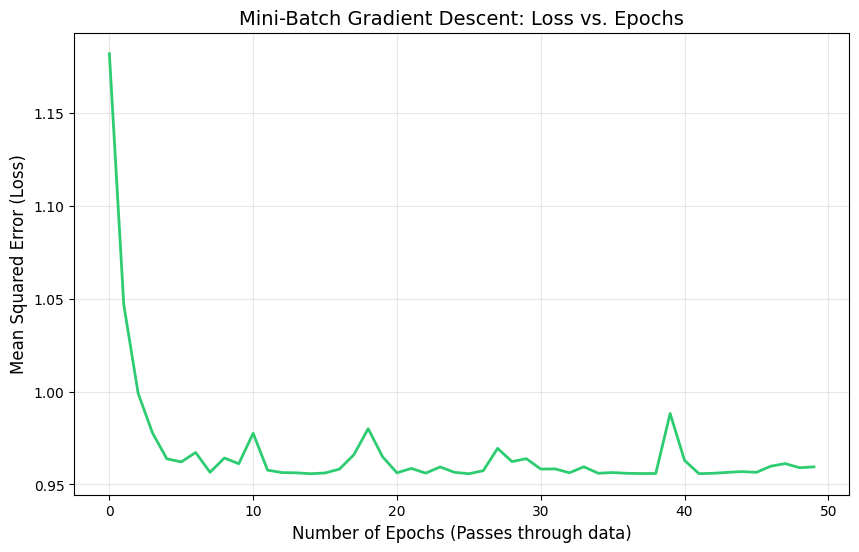

Final Weights (Coefficients for Temp & Humidity): 
[[4.94599582]
 [1.97334455]]
Final Bias (Intercept): 9.992514388029862


In [9]:
# we use a batch_size of 32 (Industry standard)
final_weights, final_bias, loss_history = mini_batch_gradient_descent(
    X, y, lr=0.1, epochs=50, batch_size=32
)

# plotting the Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(loss_history, color='#2ecc71', linewidth=2)
plt.title("Mini-Batch Gradient Descent: Loss vs. Epochs", fontsize=14)
plt.xlabel("Number of Epochs (Passes through data)", fontsize=12)
plt.ylabel("Mean Squared Error (Loss)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print(f"Final Weights (Coefficients for Temp & Humidity): \n{final_weights}")
print(f"Final Bias (Intercept): {final_bias}")